In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/insurance.csv")

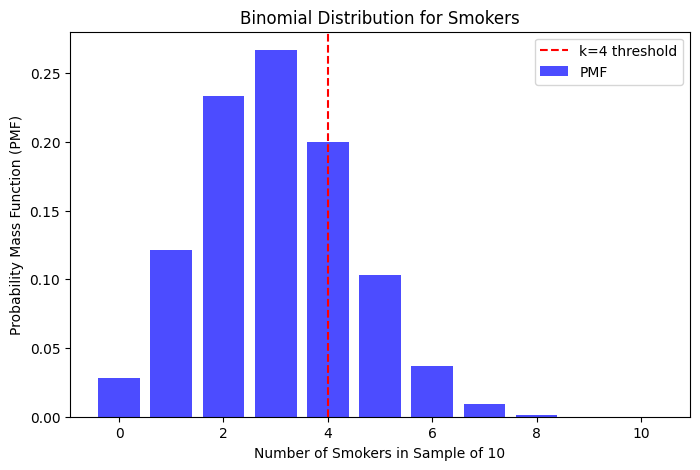

In [4]:
# (a) Probability that at least 4 out of 10 are smokers
n1, p1, k1 = 10, 0.30, 4  # n=10, p=30%, k>=4
prob_at_least_4 = 1 - stats.binom.cdf(k1 - 1, n1, p1)

# (b) Plot Binomial Distribution
x_vals_1 = np.arange(0, n1 + 1)
y_vals_1 = stats.binom.pmf(x_vals_1, n1, p1)

plt.figure(figsize=(8, 5))
plt.bar(x_vals_1, y_vals_1, color="blue", alpha=0.7, label="PMF")
plt.axvline(k1, color="red", linestyle="dashed", label="k=4 threshold")
plt.xlabel("Number of Smokers in Sample of 10")
plt.ylabel("Probability Mass Function (PMF)")
plt.title("Binomial Distribution for Smokers")
plt.legend()

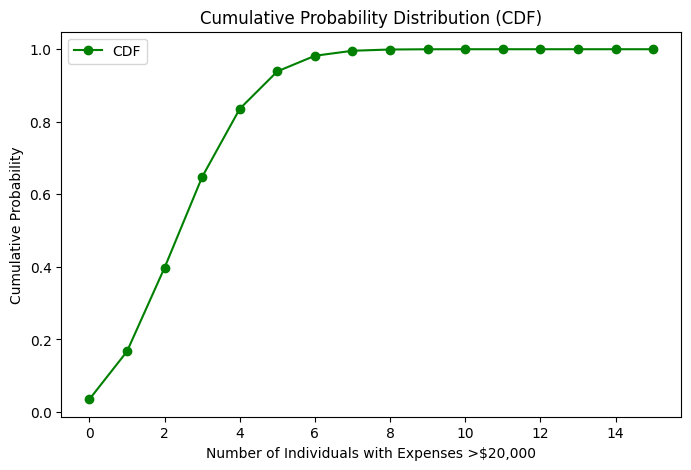

In [5]:
# Question 2: Risk Estimation Using Binomial Distribution

# (a) Probability that exactly 5 out of 15 have medical expenses above $20,000
n2, p2, k2 = 15, 0.20, 5
prob_exact_5 = stats.binom.pmf(k2, n2, p2)

# (b) Cumulative probability that at most 5 have expenses above $20,000
prob_at_most_5 = stats.binom.cdf(k2, n2, p2)

# (c) Plot the CDF
x_vals_2 = np.arange(0, n2 + 1)
y_vals_2 = stats.binom.cdf(x_vals_2, n2, p2)

plt.figure(figsize=(8, 5))
plt.plot(x_vals_2, y_vals_2, marker='o', linestyle='-', color="green", label="CDF")
plt.xlabel("Number of Individuals with Expenses >$20,000")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Probability Distribution (CDF)")
plt.legend()
plt.show()

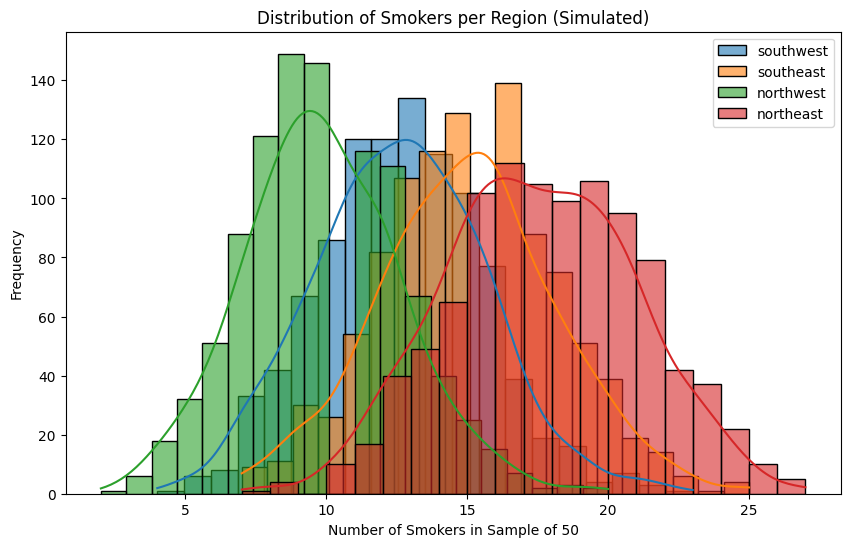

In [6]:
# Question 3: Estimating Regional Smoking Rates Using Binomial Approximation
regional_probs = {"southwest": 0.25, "southeast": 0.30, "northwest": 0.20, "northeast": 0.35}
n3, samples = 50, 1000
regional_simulations = {region: np.random.binomial(n3, p, samples) for region, p in regional_probs.items()}

# (b) Visualizing the distribution
plt.figure(figsize=(10, 6))
for region, data in regional_simulations.items():
    sns.histplot(data, bins=20, kde=True, label=region, alpha=0.6)
plt.xlabel("Number of Smokers in Sample of 50")
plt.ylabel("Frequency")
plt.title("Distribution of Smokers per Region (Simulated)")
plt.legend()
plt.show()

# (c) Compute expected number of smokers per region
expected_smokers = {region: n3 * p for region, p in regional_probs.items()}
simulated_means = {region: np.mean(data) for region, data in regional_simulations.items()}

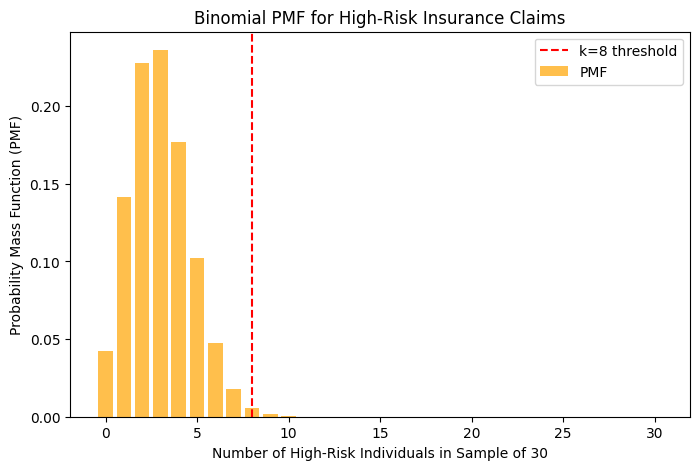

In [7]:
# Question 4: Inverse Probability & Quantile Function for Insurance Risks

# (a) Find the threshold for high-risk claims (top 10%)
high_risk_threshold = np.percentile(df["expenses"], 90)

# (b) Probability of selecting 8 high-risk individuals in a sample of 30
n4, p4, k4 = 30, 0.10, 8
prob_exact_8 = stats.binom.pmf(k4, n4, p4)

# (c) Plot PMF
x_vals_4 = np.arange(0, n4 + 1)
y_vals_4 = stats.binom.pmf(x_vals_4, n4, p4)

plt.figure(figsize=(8, 5))
plt.bar(x_vals_4, y_vals_4, color="orange", alpha=0.7, label="PMF")
plt.axvline(k4, color="red", linestyle="dashed", label="k=8 threshold")
plt.xlabel("Number of High-Risk Individuals in Sample of 30")
plt.ylabel("Probability Mass Function (PMF)")
plt.title("Binomial PMF for High-Risk Insurance Claims")
plt.legend()
plt.show()


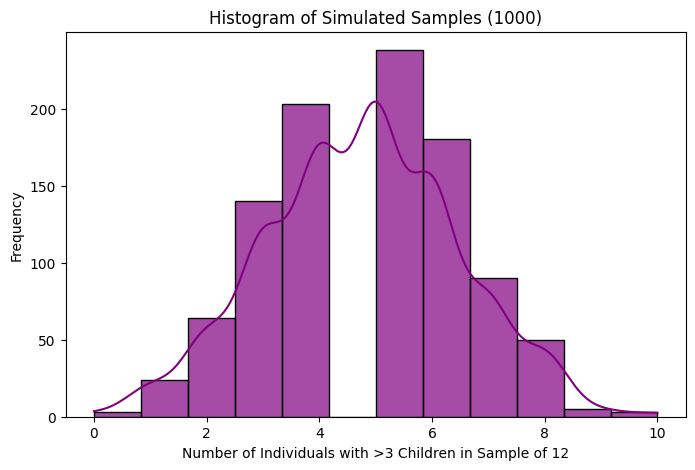

In [8]:
# Question 5: Modeling Probability of Having More than 3 Children

# (a) Probability that at least 5 out of 12 have more than 3 children
n5, p5, k5 = 12, 0.4, 5
prob_at_least_5 = 1 - stats.binom.cdf(k5 - 1, n5, p5)

# (b) Simulate 1000 samples
simulated_children = np.random.binomial(n5, p5, 1000)
plt.figure(figsize=(8, 5))
sns.histplot(simulated_children, bins=12, kde=True, color="purple", alpha=0.7)
plt.xlabel("Number of Individuals with >3 Children in Sample of 12")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated Samples (1000)")
plt.show()

# (c) Compare mean and variance with theoretical values
simulated_mean = np.mean(simulated_children)
simulated_variance = np.var(simulated_children, ddof=1)
theoretical_mean = n5 * p5
theoretical_variance = n5 * p5 * (1 - p5)


In [9]:
# Print all results
results = {
    "Question 1": {"P(at least 4 smokers)": prob_at_least_4},
    "Question 2": {"P(exactly 5 >$20K)": prob_exact_5, "P(at most 5 >$20K)": prob_at_most_5},
    "Question 3": {"Expected Smokers per Region": expected_smokers, "Simulated Means": simulated_means},
    "Question 4": {"High-Risk Threshold ($)": high_risk_threshold, "P(exactly 8 high-risk)": prob_exact_8},
    "Question 5": {"P(at least 5 >3 children)": prob_at_least_5, "Simulated Mean": simulated_mean, "Simulated Variance": simulated_variance,
                    "Theoretical Mean": theoretical_mean, "Theoretical Variance": theoretical_variance}
}

results

{'Question 1': {'P(at least 4 smokers)': 0.3503892815999998},
 'Question 2': {'P(exactly 5 >$20K)': 0.10318229431910408,
  'P(at most 5 >$20K)': 0.9389485703823359},
 'Question 3': {'Expected Smokers per Region': {'southwest': 12.5,
   'southeast': 15.0,
   'northwest': 10.0,
   'northeast': 17.5},
  'Simulated Means': {'southwest': 12.611,
   'southeast': 14.997,
   'northwest': 9.849,
   'northeast': 17.501}},
 'Question 4': {'High-Risk Threshold ($)': 34831.716,
  'P(exactly 8 high-risk)': 0.0057637902326630125},
 'Question 5': {'P(at least 5 >3 children)': 0.5618217779200001,
  'Simulated Mean': 4.759,
  'Simulated Variance': 2.8878068068068075,
  'Theoretical Mean': 4.800000000000001,
  'Theoretical Variance': 2.8800000000000003}}